In [356]:
from pprint import pprint
import numpy as np
import csv
import matplotlib.pyplot as plt
import random
import pandas as pd

data_path = "./resources/winequality-red.csv"

In [357]:
def plot_scatter_matrix(wine_data, good_treshold, bad_trashold, save_plot=False):
    count_of_props = len(wine_data[0]) - 1
    fig, axes = plt.subplots(count_of_props, count_of_props, figsize=(15, 10))
    fig.subplots_adjust(hspace=0, wspace=0)
    prop_names = wine_data[0][:-1]
    i = 0
    for ax in axes:
        ax[i].text(0.5, 0.5, prop_names[i].replace(' ', '\n'), ha='center', va='center')
        for a in ax:
            a.set_xticklabels([])
            a.set_yticklabels([])
            a.tick_params(axis='both', width=0)
        i += 1
    columns = []
    for column in range(len(wine_data[0])):
        columns.append([el[column] for el in wine_data])
    columns2 = []
    for column in columns:
        columns2.append([float(el) for el in column[1:]])
    columns = columns2
    column_height = len(columns[0])
    for i in range(count_of_props):
        for j in range(count_of_props):
            if i == j:
                continue
            good_x = []
            good_y = []
            bad_x = []
            bad_y = []
            for k in range(column_height):
                if columns[-1][k] > good_treshold:
                    good_x.append(columns[j][k])
                    good_y.append(columns[i][k])
                if columns[-1][k] < bad_trashold:
                    bad_x.append(columns[j][k])
                    bad_y.append(columns[i][k])
            dots1 = axes[i][j].plot(good_x, good_y, 'go')
            dots1[0].set_markersize(0.5)
            dots2 = axes[i][j].plot(bad_x, bad_y, 'ro')
            dots2[0].set_markersize(0.5)
    if save_plot:
        plt.savefig("./scatter_plot.png")
    plt.show()

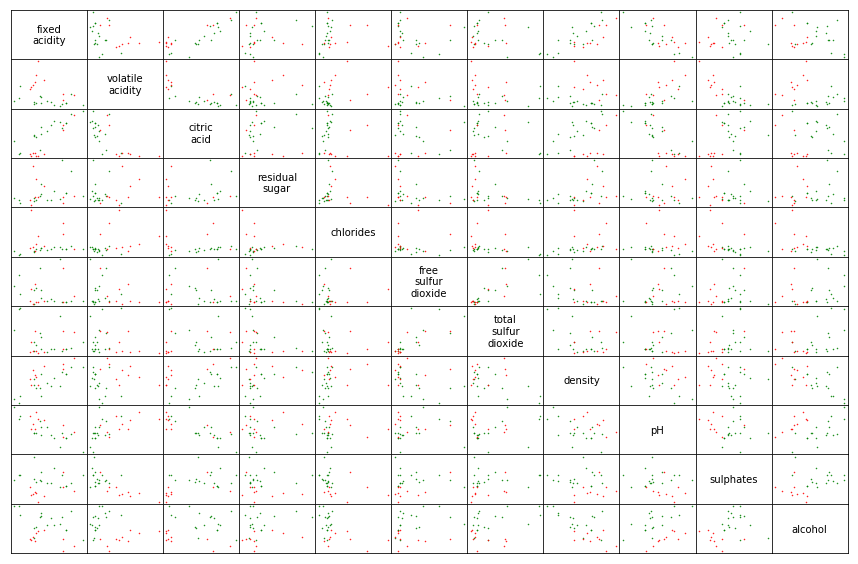

In [358]:
reader = csv.reader(open(data_path, mode='r'), delimiter=";")
data = [el for el in reader]
plot_scatter_matrix(data, 7, 4)

I prefer to take density and citric acid for perceptron training

# V.2 Learning to perceptron

In [359]:
def ft_dot(a, b):
#     a = list(a)
#     b = list(b)
    if len(a) != len(b):
        print(a)
        print(b)
        raise ValueError
    return sum([ai * bi for ai, bi in zip(a, b)])


class Perceptron():

    def __init__(self, lr=0.0001):
        self.lr = lr
        self.performance = []
        self.W = []
        self.bias = None

    def _heaviside(self, arg):
        return 1 if arg >= 0 else 0
    
    def _train_epoch(self, X, y):
        errors_num = 0
        for xi, yi in zip(X.values, y.values):
            res = ft_dot(self.W, xi) + self.bias
            if self._heaviside(res) != yi:
                errors_num += 1
                self.bias = self.bias + self.lr * (yi - self._heaviside(res))
                Wnew = []
                for w, xi_j in zip(self.W, xi):
                    wnew = w + self.lr * (yi - self._heaviside(res)) * xi_j
                    Wnew.append(wnew)
                self.W = Wnew
        return errors_num

    def train(self, X, y, epoches=0):
        self.W = [random.uniform(-1, 1) for i in range(X.shape[1])]                                                       
        self.bias = random.uniform(-1, 1)
        epoch_num = 0
        while True:
            epoch_erro_num = self._train_epoch(X, y)
            epoch_num += 1
            self.performance.append((epoch_num, epoch_erro_num, self.W, self.bias))
            if epoches == epoch_num:
                break
            if epoch_erro_num == 0:
                break
        return self.performance

In [360]:
df = pd.read_csv(data_path, sep=';')
selected_data = df[(df['quality'] > 7) | (df['quality'] < 4)][['density', 'citric acid', 'quality']]
selected_data = selected_data.reset_index(drop=True)

In [361]:
X = selected_data[['density', 'citric acid']]
y = selected_data.loc[:, ['quality']]
y.loc[y['quality'] < 4] = 0
y.loc[y['quality'] > 7] = 1
perc = Perceptron(lr=0.005)
performance = perc.train(X, y)
for el in performance:
    print('epoch num -  {} errors - {}'.format(el[0], el[1]))

epoch num -  1 errors - 10
epoch num -  2 errors - 10
epoch num -  3 errors - 10
epoch num -  4 errors - 10
epoch num -  5 errors - 8
epoch num -  6 errors - 5
epoch num -  7 errors - 5
epoch num -  8 errors - 5
epoch num -  9 errors - 6
epoch num -  10 errors - 6
epoch num -  11 errors - 6
epoch num -  12 errors - 6
epoch num -  13 errors - 6
epoch num -  14 errors - 6
epoch num -  15 errors - 6
epoch num -  16 errors - 6
epoch num -  17 errors - 6
epoch num -  18 errors - 6
epoch num -  19 errors - 6
epoch num -  20 errors - 6
epoch num -  21 errors - 6
epoch num -  22 errors - 6
epoch num -  23 errors - 6
epoch num -  24 errors - 6
epoch num -  25 errors - 6
epoch num -  26 errors - 6
epoch num -  27 errors - 6
epoch num -  28 errors - 6
epoch num -  29 errors - 6
epoch num -  30 errors - 6
epoch num -  31 errors - 6
epoch num -  32 errors - 6
epoch num -  33 errors - 6
epoch num -  34 errors - 6
epoch num -  35 errors - 6
epoch num -  36 errors - 6
epoch num -  37 errors - 6
epoch 

epoch num -  2360 errors - 12
epoch num -  2361 errors - 12
epoch num -  2362 errors - 12
epoch num -  2363 errors - 12
epoch num -  2364 errors - 12
epoch num -  2365 errors - 12
epoch num -  2366 errors - 12
epoch num -  2367 errors - 12
epoch num -  2368 errors - 13
epoch num -  2369 errors - 9
epoch num -  2370 errors - 11
epoch num -  2371 errors - 9
epoch num -  2372 errors - 11
epoch num -  2373 errors - 10
epoch num -  2374 errors - 10
epoch num -  2375 errors - 10
epoch num -  2376 errors - 10
epoch num -  2377 errors - 10
epoch num -  2378 errors - 10
epoch num -  2379 errors - 10
epoch num -  2380 errors - 10
epoch num -  2381 errors - 10
epoch num -  2382 errors - 10
epoch num -  2383 errors - 10
epoch num -  2384 errors - 10
epoch num -  2385 errors - 10
epoch num -  2386 errors - 10
epoch num -  2387 errors - 10
epoch num -  2388 errors - 10
epoch num -  2389 errors - 10
epoch num -  2390 errors - 10
epoch num -  2391 errors - 10
epoch num -  2392 errors - 10
epoch num - 

epoch num -  4360 errors - 10
epoch num -  4361 errors - 10
epoch num -  4362 errors - 10
epoch num -  4363 errors - 10
epoch num -  4364 errors - 10
epoch num -  4365 errors - 10
epoch num -  4366 errors - 10
epoch num -  4367 errors - 10
epoch num -  4368 errors - 10
epoch num -  4369 errors - 10
epoch num -  4370 errors - 10
epoch num -  4371 errors - 10
epoch num -  4372 errors - 10
epoch num -  4373 errors - 10
epoch num -  4374 errors - 10
epoch num -  4375 errors - 10
epoch num -  4376 errors - 10
epoch num -  4377 errors - 10
epoch num -  4378 errors - 10
epoch num -  4379 errors - 10
epoch num -  4380 errors - 10
epoch num -  4381 errors - 10
epoch num -  4382 errors - 10
epoch num -  4383 errors - 10
epoch num -  4384 errors - 10
epoch num -  4385 errors - 10
epoch num -  4386 errors - 10
epoch num -  4387 errors - 10
epoch num -  4388 errors - 10
epoch num -  4389 errors - 10
epoch num -  4390 errors - 10
epoch num -  4391 errors - 10
epoch num -  4392 errors - 10
epoch num 

epoch num -  6359 errors - 10
epoch num -  6360 errors - 10
epoch num -  6361 errors - 10
epoch num -  6362 errors - 10
epoch num -  6363 errors - 10
epoch num -  6364 errors - 10
epoch num -  6365 errors - 10
epoch num -  6366 errors - 10
epoch num -  6367 errors - 10
epoch num -  6368 errors - 10
epoch num -  6369 errors - 10
epoch num -  6370 errors - 10
epoch num -  6371 errors - 10
epoch num -  6372 errors - 10
epoch num -  6373 errors - 10
epoch num -  6374 errors - 8
epoch num -  6375 errors - 10
epoch num -  6376 errors - 12
epoch num -  6377 errors - 12
epoch num -  6378 errors - 12
epoch num -  6379 errors - 12
epoch num -  6380 errors - 12
epoch num -  6381 errors - 13
epoch num -  6382 errors - 11
epoch num -  6383 errors - 12
epoch num -  6384 errors - 12
epoch num -  6385 errors - 13
epoch num -  6386 errors - 9
epoch num -  6387 errors - 11
epoch num -  6388 errors - 9
epoch num -  6389 errors - 10
epoch num -  6390 errors - 11
epoch num -  6391 errors - 9
epoch num -  6

epoch num -  8359 errors - 8
epoch num -  8360 errors - 6
epoch num -  8361 errors - 10
epoch num -  8362 errors - 4
epoch num -  8363 errors - 4
epoch num -  8364 errors - 10
epoch num -  8365 errors - 6
epoch num -  8366 errors - 10
epoch num -  8367 errors - 6
epoch num -  8368 errors - 10
epoch num -  8369 errors - 10
epoch num -  8370 errors - 10
epoch num -  8371 errors - 10
epoch num -  8372 errors - 8
epoch num -  8373 errors - 10
epoch num -  8374 errors - 8
epoch num -  8375 errors - 10
epoch num -  8376 errors - 10
epoch num -  8377 errors - 10
epoch num -  8378 errors - 8
epoch num -  8379 errors - 10
epoch num -  8380 errors - 8
epoch num -  8381 errors - 10
epoch num -  8382 errors - 8
epoch num -  8383 errors - 10
epoch num -  8384 errors - 8
epoch num -  8385 errors - 10
epoch num -  8386 errors - 8
epoch num -  8387 errors - 10
epoch num -  8388 errors - 8
epoch num -  8389 errors - 10
epoch num -  8390 errors - 8
epoch num -  8391 errors - 11
epoch num -  8392 errors 

epoch num -  10358 errors - 8
epoch num -  10359 errors - 8
epoch num -  10360 errors - 10
epoch num -  10361 errors - 8
epoch num -  10362 errors - 10
epoch num -  10363 errors - 8
epoch num -  10364 errors - 10
epoch num -  10365 errors - 8
epoch num -  10366 errors - 8
epoch num -  10367 errors - 11
epoch num -  10368 errors - 10
epoch num -  10369 errors - 9
epoch num -  10370 errors - 8
epoch num -  10371 errors - 11
epoch num -  10372 errors - 10
epoch num -  10373 errors - 10
epoch num -  10374 errors - 10
epoch num -  10375 errors - 10
epoch num -  10376 errors - 10
epoch num -  10377 errors - 11
epoch num -  10378 errors - 13
epoch num -  10379 errors - 8
epoch num -  10380 errors - 9
epoch num -  10381 errors - 12
epoch num -  10382 errors - 13
epoch num -  10383 errors - 9
epoch num -  10384 errors - 10
epoch num -  10385 errors - 11
epoch num -  10386 errors - 9
epoch num -  10387 errors - 10
epoch num -  10388 errors - 11
epoch num -  10389 errors - 9
epoch num -  10390 er

epoch num -  12358 errors - 10
epoch num -  12359 errors - 10
epoch num -  12360 errors - 10
epoch num -  12361 errors - 10
epoch num -  12362 errors - 10
epoch num -  12363 errors - 10
epoch num -  12364 errors - 10
epoch num -  12365 errors - 10
epoch num -  12366 errors - 10
epoch num -  12367 errors - 10
epoch num -  12368 errors - 10
epoch num -  12369 errors - 12
epoch num -  12370 errors - 8
epoch num -  12371 errors - 8
epoch num -  12372 errors - 10
epoch num -  12373 errors - 10
epoch num -  12374 errors - 12
epoch num -  12375 errors - 8
epoch num -  12376 errors - 8
epoch num -  12377 errors - 9
epoch num -  12378 errors - 11
epoch num -  12379 errors - 8
epoch num -  12380 errors - 9
epoch num -  12381 errors - 11
epoch num -  12382 errors - 8
epoch num -  12383 errors - 9
epoch num -  12384 errors - 11
epoch num -  12385 errors - 9
epoch num -  12386 errors - 10
epoch num -  12387 errors - 11
epoch num -  12388 errors - 10
epoch num -  12389 errors - 10
epoch num -  12390

In [362]:
def plot_performance(performance, data, good_thresh, bad_thresh, epoch=-1, save_plot=False):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    axes[0].set_xlabel('epoch')
    axes[0].set_ylabel('classification errors')
    axes[0].set_title('Errors as a function of epoch')
    if epoch > len(performance):
        raise Exception('too large epoch num passed')
    if epoch > 0:
        errors = [el[1] for el, feature in zip(performance, range(epoch))]
        epoches = [el[0] for el, feature in zip(performance, range(epoch))]
    else:
        errors = [el[1] for el in performance]
        epoches = [el[0] for el in performance]
    axes[0].plot(epoches, errors)
    if epoch > 0:
        W = performance[epoch][2]
        bias = performance[epoch][3]
    else:
        W = performance[-1][2]
        bias = performance[-1][3]
    w = -(W[0] / W[1])
    b = -bias/W[1]
    x = [x for x in np.arange(-15, 15, .01)]
    y = [(w * xi + b) for xi in x]
    axes[1].plot(x, y, 'b--', linewidth='1', label='Decision boundary')
    axes[1].set_xlabel('density')
    axes[1].set_ylabel('citric acid')
    if epoch > 0:
        epoch_last = epoch
    else:
        epoch_last = performance[-1][0]
    axes[1].set_title('Decision boundary on epoch: ' + str(epoch_last))
    good_x, good_y, bad_x, bad_y = [], [], [], []
    for line in data.values:
        if line[-1] >= good_thresh or line[-1] <= bad_thresh:
            if line[-1] >= good_thresh:
                good_x.append(line[0])
                good_y.append(line[1])
            if line[-1] <= bad_thresh:
                bad_x.append(line[0])
                bad_y.append(line[1])
    dots1 = axes[1].plot(good_x, good_y, 'go', label='good wines(>=' + str(good_thresh) + ' score)')
    dots2 = axes[1].plot(bad_x, bad_y, 'ro', label='bad wines(<=' + str(bad_thresh) + ' score)')
    good_x.extend(bad_x)
    good_y.extend(bad_y)
    min_x_axes = min(good_x) - 0.01
    max_x_axes = max(good_x) + 0.01
    min_y_axes = min(good_y) - 0.01
    max_y_axes = max(good_y) + 0.01
    axes[1].set_xlim([min_x_axes, max_x_axes])
    axes[1].set_ylim([min_y_axes, max_y_axes])
    dots1[0].set_markersize(1.5)
    dots2[0].set_markersize(1.5)
    y_just_values = [yi[0] for yi in y]
    axes[1].fill_between(x, y_just_values, min_y_axes, color='#D89797')
    axes[1].fill_between(x, y_just_values, max_y_axes, color='#B8F4C0')
    box = axes[1].get_position()
    axes[1].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    if save_plot:
        fig.savefig("./decision_boundary.png")

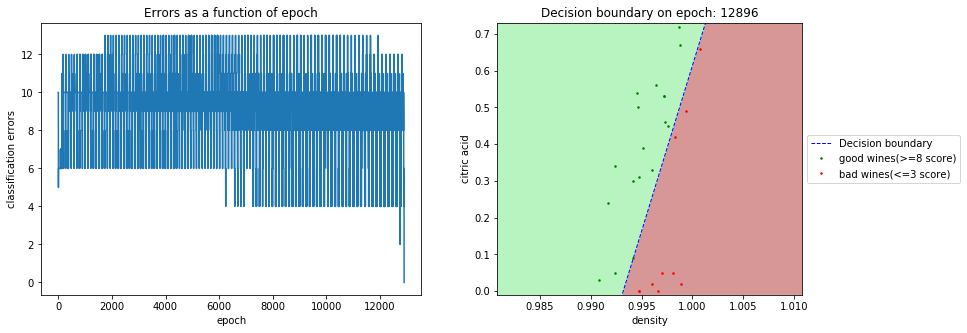

In [363]:
plot_performance(performance, selected_data, 8, 3)

## Feature scaling
 if we scale our data,the training process will be much faster

In [364]:
def normalize_data(column, mod='mean'):
    if mod == 'mean':
        return (column - column.mean()) / (column.max() - column.min())
    elif mod == 'minmax':
        return (column - column.min()) / (column.max() - column.min())
    else:
        raise ValueError('Doesnt correct mod type.')

In [365]:
norm_data = selected_data.copy(deep=True)
norm_data['density'] = normalize_data(norm_data['density'])
norm_data['citric acid'] = normalize_data(norm_data['citric acid'])
print(norm_data)

     density  citric acid  quality
0   0.128357     0.204861        8
1   0.158357     0.190972        8
2  -0.361643    -0.364583        8
3   0.268357     0.565972        8
4   0.278357     0.496528        8
5   0.478357     0.482639        3
6   0.038357     0.343750        8
7   0.118357     0.302083        8
8   0.118357     0.302083        8
9   0.338357     0.246528        3
10 -0.431643    -0.100694        8
11  0.058357    -0.434028        3
12 -0.184643    -0.309028        8
13  0.230357     0.149306        3
14  0.290357    -0.406250        3
15 -0.139643     0.260417        8
16 -0.150643     0.315972        8
17 -0.366643     0.038194        8
18 -0.085643     0.107639        8
19 -0.521643    -0.392361        8
20 -0.125643    -0.434028        3
21 -0.130643    -0.434028        3
22 -0.001643     0.024306        8
23 -0.129643    -0.003472        8
24  0.103357    -0.364583        3
25  0.206357    -0.364583        3
26 -0.001643    -0.406250        3
27 -0.182643    -0.0

In [366]:
X_norm = norm_data[['density', 'citric acid']]
y = norm_data.loc[:, ['quality']]
y.loc[y['quality'] < 4] = 0
y.loc[y['quality'] > 7] = 1
perc = Perceptron(lr=0.005)
performance = perc.train(X_norm, y, epoches=-1)
for el in performance:
    print('epoch num -  {} errors - {}'.format(el[0], el[1]))

epoch num -  1 errors - 28
epoch num -  2 errors - 22
epoch num -  3 errors - 21
epoch num -  4 errors - 20
epoch num -  5 errors - 20
epoch num -  6 errors - 20
epoch num -  7 errors - 20
epoch num -  8 errors - 20
epoch num -  9 errors - 20
epoch num -  10 errors - 20
epoch num -  11 errors - 20
epoch num -  12 errors - 20
epoch num -  13 errors - 20
epoch num -  14 errors - 20
epoch num -  15 errors - 19
epoch num -  16 errors - 20
epoch num -  17 errors - 19
epoch num -  18 errors - 20
epoch num -  19 errors - 19
epoch num -  20 errors - 20
epoch num -  21 errors - 20
epoch num -  22 errors - 18
epoch num -  23 errors - 18
epoch num -  24 errors - 16
epoch num -  25 errors - 12
epoch num -  26 errors - 9
epoch num -  27 errors - 8
epoch num -  28 errors - 4
epoch num -  29 errors - 5
epoch num -  30 errors - 3
epoch num -  31 errors - 3
epoch num -  32 errors - 2
epoch num -  33 errors - 2
epoch num -  34 errors - 2
epoch num -  35 errors - 2
epoch num -  36 errors - 2
epoch num - 

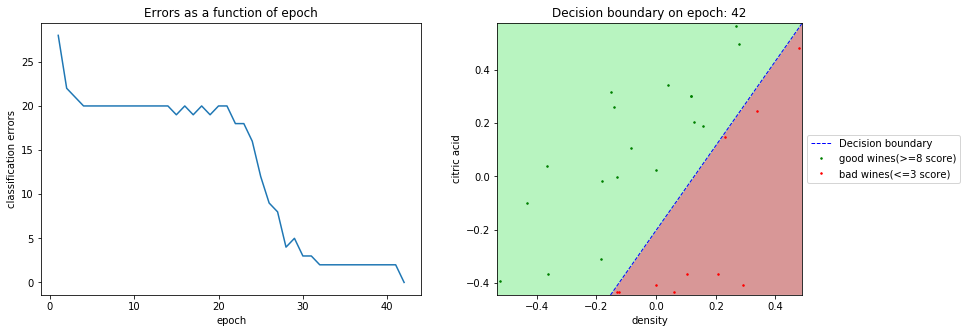

In [367]:
plot_performance(performance, norm_data, 8, 3)

# V.3 My fair ADALINE

Encouraged by the results of your perceptron, you decide to see if you can use it to
distinguish between wines with a score of 4 and lower, and wines with a score
of 7 and higher. Feeling confident, you decide to let the perceptron train until it can
find the best decision boundary.

In [368]:
class Adaline:

    def __init__(self, lr=0.01):
        self.lr = lr
        self.W = []
        self.performance = []
        self.errors_batch = []
        self.bias = None

    def _sigmoid(self, arg):
        return 1 / (1 + np.exp(-arg))

    def _activ_func(self, arg):
        return 1 if self._sigmoid(arg) >= 0.5 else 0

    def _train_epoch_online(self, X, y):
        errors_num = 0
        for xi, yi in zip(X.values, y.values):
            res = ft_dot(xi, self.W) + self.bias
            if self._activ_func(res) != yi:
                errors_num += 1
                self.bias = self.bias + self.lr * (yi - self._activ_func(res))
                Wnew = []
                for xi_j, w in zip(xi, self.W):
                    wnew = w + self.lr * (yi - self._activ_func(res)) * xi_j
                    Wnew.append(wnew)
                self.W = Wnew
        return errors_num

    def _train_epoch_batch(self, X, y):
        errors_num = 1
        erros_batch = []
        for xi, yi in zip(X.values, y.values):
            res = ft_dot(xi, self.W) + self.bias
            if self._activ_func(res) != yi:
                errors_num += 1
                erros_batch.append([xi, yi])
        self.errors_batch.append(erros_batch)

        for xi, yi in erros_batch:
            res = ft_dot(xi, self.W) + self.bias
            self.bias = self.bias + self.lr * (yi - self._activ_func(res))
            Wnew = []
            for xi_j, w in zip(xi, self.W):
                wnew = w + self.lr * (yi - self._activ_func(res)) * xi_j
                Wnew.append(wnew)
            self.W = Wnew
        return errors_num

    def train(self, X, y, epoches=-1, mod='online'):
        self.W = [random.uniform(-1, 1) for i in range(X.shape[1])] 
        self.bias = random.uniform(-1, 1)
        epoch_num = 0
        if mod == 'online':
            while True:
                epoch_erro_num = self._train_epoch_online(X, y)
                epoch_num += 1
                self.performance.append((epoch_num, epoch_erro_num, self.W, self.bias))
#                 pprint((epoch_num, epoch_erro_num, self.W, self.bias))
                if epoches == epoch_num and epoches > 0:
                    break
                if epoch_erro_num == 0:
                    break
            return self.performance
        elif mod == 'batch':
            while True:
                epoch_erro_num = self._train_epoch_batch(X, y)
                epoch_num += 1
                self.performance.append((epoch_num, epoch_erro_num, self.W, self.bias))
#                 pprint((epoch_num, epoch_erro_num, self.W, self.bias))
                if epoches == epoch_num and epoches > 0:
                    break
                if epoch_erro_num == 0:
                    break
            return self.performance
        else:
            raise ValueError('Mod isnt correct')

    def predict(self, X):
        predicted_values = []
        for xi in X.values:
            res = ft_dot(xi, self.W) + self.bias
            predicted_values.append(self._activ_func(res))
        return predicted_values

In [369]:
selected_data = df[(df['quality'] >= 7) | (df['quality'] <= 4)][['density', 'citric acid', 'quality']]
selected_data = selected_data.reset_index(drop=True)
norm_data = selected_data.copy(deep=True)
norm_data['density'] = normalize_data(norm_data['density'])
norm_data['citric acid'] = normalize_data(norm_data['citric acid'])
X_norm = norm_data[['density', 'citric acid']]
y = norm_data.loc[:, ['quality']]
y.loc[y['quality'] <= 4] = 0
y.loc[y['quality'] >= 7] = 1
adaline = Adaline(lr=0.005)
performance = adaline.train(X_norm, y, mod='batch', epoches=500)
print(performance[-1])

(500, 218, [array([-0.00365507]), array([0.00215561])], array([0.00759759]))


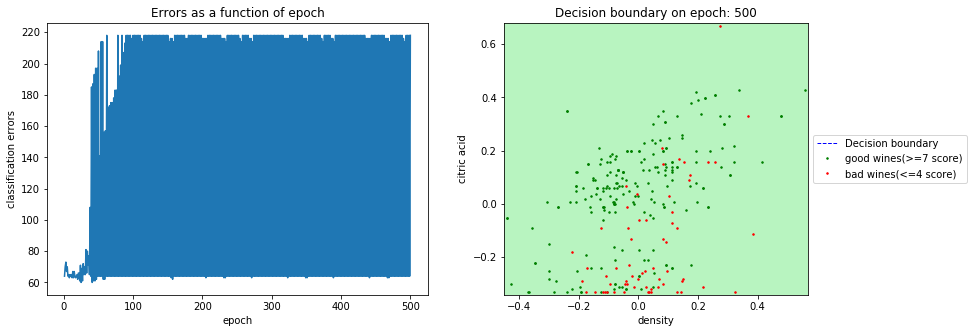

In [370]:
plot_performance(performance, norm_data, 7, 4)

## V.4 Advanced wine sampling and resampling

a) Holdout method to partition and checking accuracy with this method

In [371]:
def holdout_part(df, parts_num=5):
    if parts_num <= 0:
        raise ValueError('Doesnt correct parts num.')
    rows_num = len(df)
    slice_len = rows_num // parts_num
    train_df = df[:rows_num - slice_len]
    valid_df = df[rows_num - slice_len:]
    return train_df, valid_df

In [372]:
train_df, valid_df = holdout_part(selected_data)
X_train = train_df[['density', 'citric acid']]
y_train = train_df.loc[:, ['quality']]
y_train.loc[y['quality'] <= 4] = 0
y_train.loc[y['quality'] >= 7] = 1
epoches = 500
adaline = Adaline(lr=0.005)
performance = adaline.train(X, y, epoches=epoches)
X_valid = valid_df[['density', 'citric acid']]
y_valid = valid_df.loc[:, ['quality']]
y_valid.loc[y['quality'] <= 4] = 0
y_valid.loc[y['quality'] >= 7] = 1
pred_vals = adaline.predict(X_valid)
pred_errors = 0
for y_true, y_pred in zip(y_valid.values, pred_vals):
    if y_true == y_pred:
        pred_errors += 1
accuracy = 1 - (pred_errors / len(y_valid))
print('Accuracy of prediction after {} train epoches - {}%'.format(epoches, accuracy * 100))

accuracy of prediction after 500 train epoches - 100.0%


b)  K-fold cross-validation method of partition and checking accuracy with this method

In [373]:
def k_fold_part(df, parts_num=5, valid_fold_num=1, shuffle=False):
    if parts_num <= 0 or valid_fold_num <= 0 or valid_fold_num > parts_num:
        raise ValueError('Doesnt correct parts num or valid fold num.')
    if shuffle:
        df = df.sample(frac=1).reset_index(drop=True)
    res = df
    rows_num = len(res)
    slice_len = rows_num // parts_num
    start = slice_len * (valid_fold_num - 1)
    end = start + slice_len
    valid_df = res.loc[start:end-1, :]
    before_start = res.loc[:start-1, :]
    after_end = res.loc[end:, :]
    train_df = before_start.append(after_end)
    return train_df, valid_df

In [375]:
folds = 5
error_nums = []
for train_try in range(1, folds + 1):
    train_set, valid_set = k_fold_part(selected_data, valid_fold_num=train_try, parts_num=folds, shuffle=True)
    X_train = train_df[['density', 'citric acid']]
    y_train = train_df.loc[:, ['quality']]
    y_train.loc[y['quality'] <= 4] = 0
    y_train.loc[y['quality'] >= 7] = 1
    adaline = Adaline(lr=0.005)
    adaline.train(X_train, y_train, mod='online', epoches=epoches)
    X_valid = valid_df[['density', 'citric acid']]
    y_valid = valid_df.loc[:, ['quality']]
    y_valid.loc[y['quality'] <= 4] = 0
    y_valid.loc[y['quality'] >= 7] = 1
    predict_values = adaline.predict(X_valid)
    clas_errors = 0
    for y_pred, y_true in zip(predict_values, y_valid):
        if y_pred != y_true:
            clas_errors += 1
    clas_errors = 1 - (clas_errors / len(y_train))
    error_nums.append(clas_errors)
accuracy = sum(error_nums) / len(error_nums) * 100
print('Average accuracy of prediction after {} train epoches - {}%'.format(epoches, accuracy))

Average accuracy of prediction after 500 train epoches - 99.55357142857142%


## V.5 Adventures in the Nth dimension

a) Try training your perceptron/ADALINE with different numbers and types of chemical
factors. Under what circumstances can your perceptron/ADALINE successfully
train?

In [382]:
selected_data = df[(df['quality'] > 7) | (df['quality'] < 4)][['density', 'citric acid', 'pH', 'quality']]
selected_data = selected_data.reset_index(drop=True)
norm_data = selected_data.copy(deep=True)
norm_data['density'] = normalize_data(norm_data['density'])
norm_data['citric acid'] = normalize_data(norm_data['citric acid'])
norm_data['pH'] = normalize_data(norm_data['pH'])
train_df, valid_df = k_fold_part(norm_data, shuffle=True)
X_train = train_df[['density', 'citric acid', 'pH']]
y_train = train_df.loc[:, ['quality']]
y_train.loc[y['quality'] < 4] = 0
y_train.loc[y['quality'] > 7] = 1
epoches = 500
adaline = Adaline(lr=0.005)
performance = adaline.train(X_train, y, epoches=epoches)
X_valid = valid_df[['density', 'citric acid', 'pH']]
y_valid = valid_df.loc[:, ['quality']]
y_valid.loc[y['quality'] < 4] = 0
y_valid.loc[y['quality'] > 7] = 1
pred_vals = adaline.predict(X_valid)
pred_errors = 0
for y_true, y_pred in zip(y_valid.values, pred_vals):
    if y_true == y_pred:
        pred_errors += 1
accuracy = 1 - (pred_errors / len(y_valid))
print('Accuracy of prediction after {} train epoches - {}%'.format(epoches, accuracy * 100))

Accuracy of prediction after 500 train epoches - 80.0%


b) You know what the decision boundary for 2 wine chemical factors looks like, but what
does the decision boundary for 3 factors look like? What about if you use 7 factors?
How about if you use all 11 wine chemical factors?

Desicion boundary for 3 factors look like a plane, for 4 factors it look like a space.
But if we take nore then 4 factors desicion boundary will look like hyperplane.
Space with more then 3 axes.
## Imagine it (badUUUm in your brain) but tou may try.